<a href="https://colab.research.google.com/github/KSriNarasimha/Streamlit_APP_Titanic_Survival_Prediction/blob/main/8)_Logistic_Regression_%26_Streamlit_deployment(K_Sri__Narasimha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

# **1. Data Exploration:**

# **a). Load the dataset and perform exploratory data analysis (EDA)**

In [1]:
#Load basic Libraries
import pandas as pd
import numpy as np


# Load the dataset (e.g., Titanic dataset)
Train_data = pd.read_csv('Titanic_train.csv')
Test_data = pd.read_csv('Titanic_test.csv')

# **b). Examine the features, their types, and summary statistics.**

# **1)Train dataset : the features, their types, and summary statistics**

In [2]:
#Print Trian dataset
Train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Explore the dataset
Train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
Train_data.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [7]:
Train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# **2)Test dataset : the features, their types, and summary statistics**

In [8]:
#Explore Test dataset

Test_data #Print Test dataset




,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
Test_data.head()



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
Test_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
Test_data.describe()



,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
Test_data.dtypes



,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [13]:
Test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


# **Combine Test and Train Dataset**

In [14]:
#Combine Test and Train dataset in one table using "Concat"
Data = pd.concat([Train_data, Test_data], ignore_index=True)


In [15]:
#Print Data (Train dataset + Test dataset)

Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
#Print Data table information
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [17]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [18]:
Data.dtypes

,0
PassengerId,int64
Survived,float64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [19]:
Data.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [20]:
# Summary statistics
Data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


# **C). Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.**

# **Create visualizations**

In [21]:
#import Basic Libraries
import matplotlib.pyplot as plt
import seaborn as sns





# 1.   **Histogram**







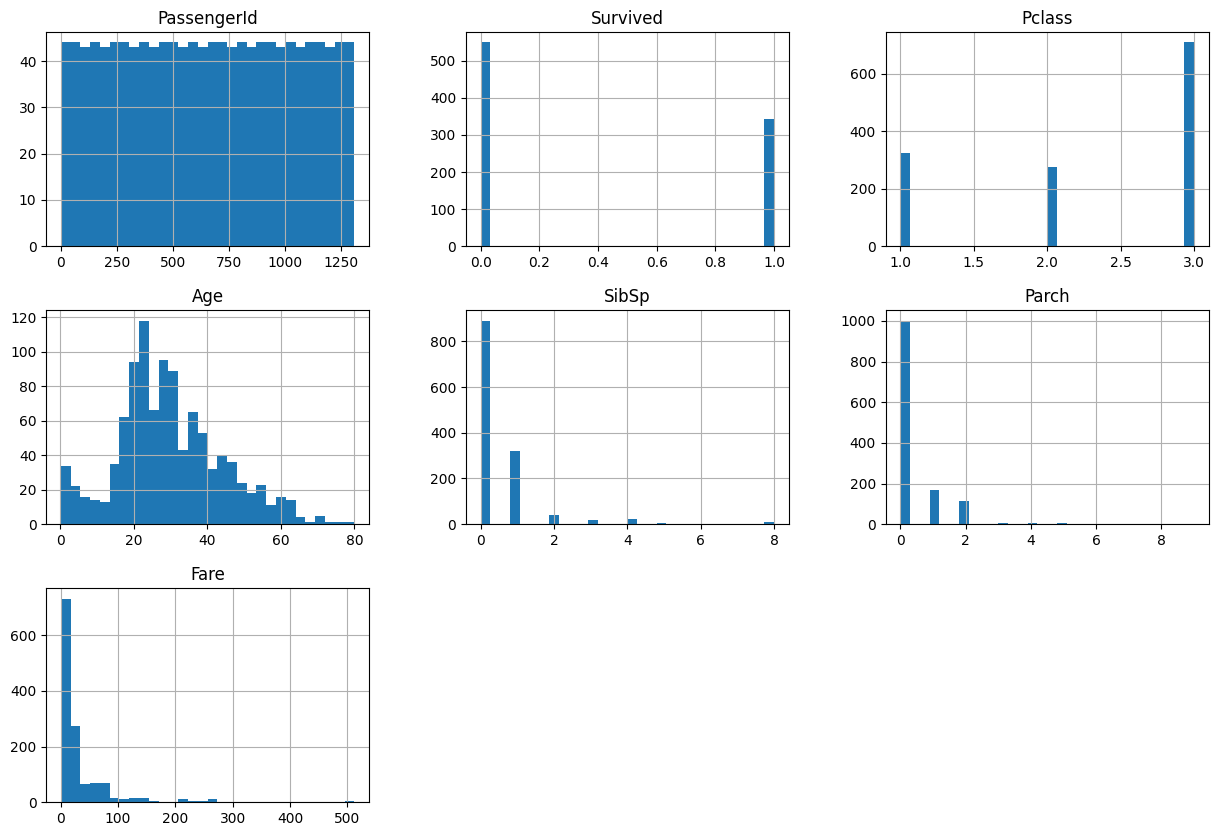

In [22]:
# Histograms for numerical features
Data.hist(bins=30, figsize=(15, 10))
plt.show()



# 2. **Box Plot**






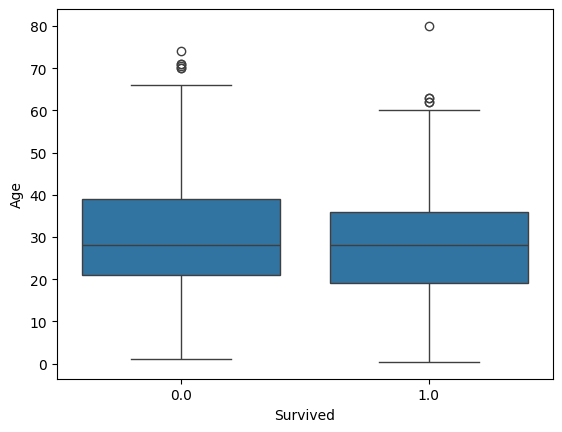

In [23]:
# Box plot for a numerical feature vs target
sns.boxplot(x='Survived', y='Age', data=Data)
plt.show()

# **3.Pair Plot**

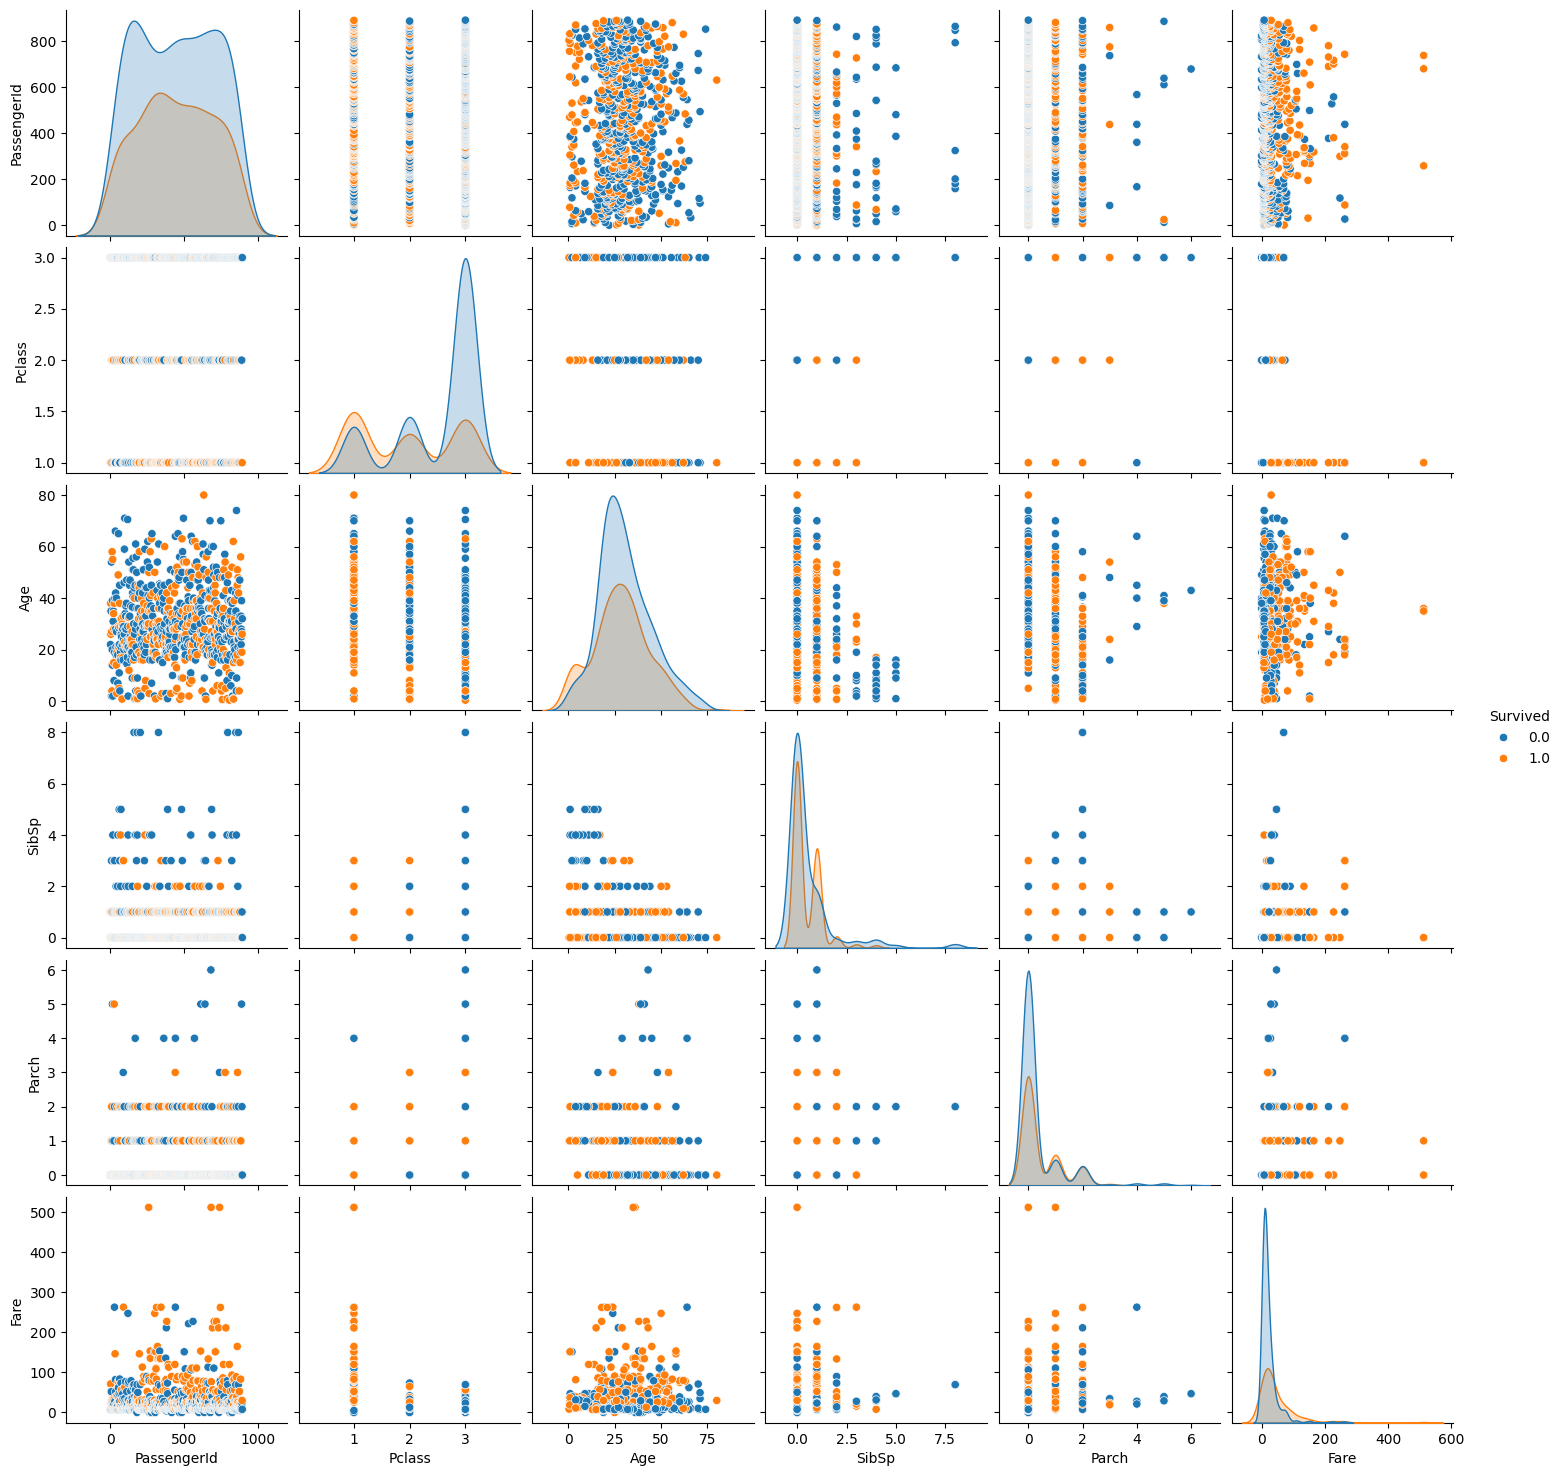

In [24]:
# Pair plot to visualize relationships
sns.pairplot(Data, hue='Survived')
plt.show()

# **d) Analyze any patterns or correlations observed in the data.**

In [25]:
# Calculate the correlation matrix for numerical columns only
correlation_matrix = Data.select_dtypes(include=np.number).corr()
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.038354  0.028814 -0.055224  0.008942   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.038354 -0.338481  1.000000 -0.408106  0.060832  0.018322   
Age             0.028814 -0.077221 -0.408106  1.000000 -0.243699 -0.150917   
SibSp          -0.055224 -0.035322  0.060832 -0.243699  1.000000  0.373587   
Parch           0.008942  0.081629  0.018322 -0.150917  0.373587  1.000000   
Fare            0.031428  0.257307 -0.558629  0.178740  0.160238  0.221539   

                 Fare  
PassengerId  0.031428  
Survived     0.257307  
Pclass      -0.558629  
Age          0.178740  
SibSp        0.160238  
Parch        0.221539  
Fare         1.000000  


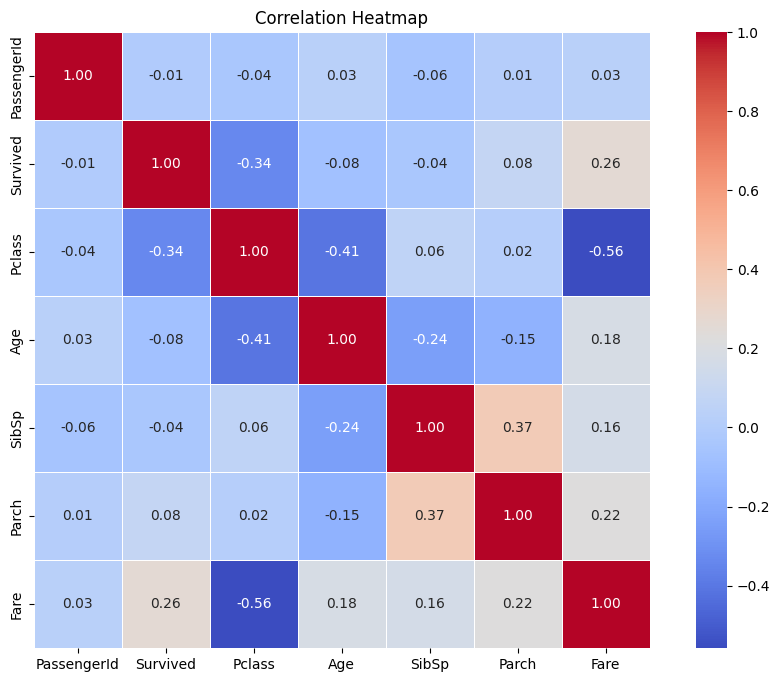

In [26]:
#Heat map

# Import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Set title
plt.title('Correlation Heatmap')
plt.show()


# **2. Data Preprocessing:**

# **a). Encode categorical variables.**
  # **one-hot encoding**

In [27]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
#Encoding C,Q,S as 1,2,3

# Define the mapping for Embarked
embarked_mapping = {
    'C': 1,
    'Q': 2,
    'S': 3
}

# Apply the mapping
Data['Embarked'] = Data['Embarked'].map(embarked_mapping)

print("\nDataFrame after encoding Embarked:")
print(Data)



DataFrame after encoding Embarked:
      PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...            

In [29]:
# Perform one-hot encoding
Data_encoded = pd.get_dummies(Data, columns=['Sex'], drop_first=True)

In [30]:
# If the columns were boolean (True/False)
Data['Sex'] = [True if i%2==0 else False for i in range(Data.shape[0])] # Create a list of booleans with the same length as the DataFrame

# Convert boolean to integer for the entire DataFrame
Data['Sex'] = Data['Sex'].astype(int)


#print("\nDataFrame after converting Sex from bool to int:")
#print(Data)
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,3.0


In [31]:
Data_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,3.0,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,False
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.0,False
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,3.0,True
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,1.0,False
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,3.0,True
1307,1308,NaN,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,3.0,True


# **a). Handle missing values (e.g., imputation).**

# **Imputation**

In [32]:
Data.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [33]:
Data.shape

(1309, 12)

In [34]:
#Imputation

# Fill /Imputing missing values of 'Age' column with median
Data['Age'].fillna(Data['Age'].median(), inplace=True)

# Fill / Imputing missing values of 'Survived' column with Median
Data['Survived'].fillna(Data['Survived'].median(), inplace=True)

# Fill / Imputing missing values of 'Fare' column with median
Data['Fare'].fillna(Data['Fare'].median(), inplace=True)

# Fill / Imputing missing values of 'Embarked' column with mode
Data['Embarked'].fillna(Data['Embarked'].median(), inplace=True)



<ipython-input-34-fa5ebc5193ab>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Age'].fillna(Data['Age'].median(), inplace=True)
<ipython-input-34-fa5ebc5193ab>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

# **Drop**

In [35]:
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,"Spector, Mr. Woolf",1,28.0,0,0,A.5. 3236,8.0500,NaN,3.0
1305,1306,0.0,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,1.0
1306,1307,0.0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,3.0
1307,1308,0.0,3,"Ware, Mr. Frederick",0,28.0,0,0,359309,8.0500,NaN,3.0


In [36]:
# Drop other missing values (e.g., Cabin), as it is not needed
#Data.dropna(subset=['Cabin'], inplace=True)


In [37]:
# Delete the Cabin column
Data = Data.drop(columns=['Cabin', 'Name', 'Ticket'])

#print("\nDataFrame after deleting Cabin column:")
#print(data)
Data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,3.0
1,2,1.0,1,0,38.0,1,0,71.2833,1.0
2,3,1.0,3,1,26.0,0,0,7.9250,3.0
3,4,1.0,1,0,35.0,1,0,53.1000,3.0
4,5,0.0,3,1,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,1,28.0,0,0,8.0500,3.0
1305,1306,0.0,1,0,39.0,0,0,108.9000,1.0
1306,1307,0.0,3,1,38.5,0,0,7.2500,3.0
1307,1308,0.0,3,0,28.0,0,0,8.0500,3.0


In [38]:
Data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [39]:
Data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,3.0
1,2,1.0,1,0,38.0,1,0,71.2833,1.0
2,3,1.0,3,1,26.0,0,0,7.9250,3.0
3,4,1.0,1,0,35.0,1,0,53.1000,3.0
4,5,0.0,3,1,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,1,28.0,0,0,8.0500,3.0
1305,1306,0.0,1,0,39.0,0,0,108.9000,1.0
1306,1307,0.0,3,1,38.5,0,0,7.2500,3.0
1307,1308,0.0,3,0,28.0,0,0,8.0500,3.0


In [40]:
#Number of Rows and Columns after imputation and dropping
Data.shape

(1309, 9)

In [41]:
# Summary statistics
Data.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.261268,2.294882,0.500382,29.503186,0.498854,0.385027,33.281086,2.493506
std,378.020061,0.439494,0.837836,0.500191,12.905241,1.041658,0.865560,51.741500,0.814244
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,655.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,982.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,3.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,3.000000


# **3. Model Building:**

## **a). Build a logistic regression model using appropriate libraries (e.g., scikit-learn).**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features and target
X = Data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]
y = Data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [43]:
#Predict for X dataset
y_pred = model.predict(X)

In [44]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': model.predict(X)})

In [45]:
y_pred_df.head(100)

,actual,predicted_prob
0,0.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
95,0.0,0.0
96,0.0,0.0
97,1.0,1.0
98,1.0,0.0


In [46]:
y_pred_df.tail(20)

,actual,predicted_prob
1289,0.0,0.0
1290,0.0,0.0
1291,0.0,1.0
1292,0.0,0.0
1293,0.0,1.0
1294,0.0,1.0
1295,0.0,0.0
1296,0.0,0.0
1297,0.0,0.0
1298,0.0,0.0


# **4. Model Evaluation:**
# **a). Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.**


In [47]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[927  40]
 [290  52]]


In [48]:
((927+52)/(927+40+290+52))*100

74.78991596638656

In [49]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85       967
         1.0       0.57      0.15      0.24       342

    accuracy                           0.75      1309
   macro avg       0.66      0.56      0.54      1309
weighted avg       0.71      0.75      0.69      1309



In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')



Accuracy: 0.7366412213740458
Precision: 0.6428571428571429
Recall: 0.1232876712328767
F1 Score: 0.20689655172413793
ROC AUC Score: 0.6981952598390955


# **Visualize the ROC curve.**

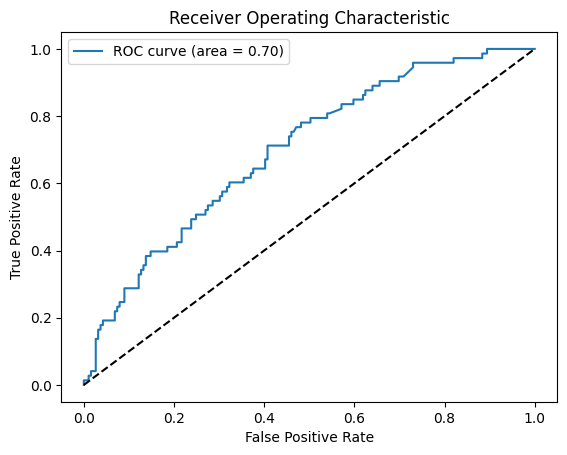

In [51]:
# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.show()


# **5. Interpretation:**
# **a). Interpret the coefficients of the logistic regression model.**


In [52]:
# Coefficients interpretation
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
print(coefficients)


          Coefficient
Pclass      -0.732905
Age         -0.026329
SibSp       -0.112356
Parch        0.108173
Fare         0.002041
Sex         -0.115978
Embarked    -0.101758


# **b). Discuss the significance of features**


*  **The coefficients indicate the effect of each feature on the log odds of the target variable. Positive coefficients increase the likelihood of survival, while negative coefficients decrease it.**

# **6. Deployment with Streamlit**

In [53]:
pip install streamlit joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.3 MB/s eta 0:00:00


In [54]:
import joblib

# Save the model after training
joblib.dump(model, 'titanic_model.pkl')


['titanic_model.pkl']

In [55]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('titanic_model.pkl')

# Streamlit app title
st.title("Titanic Survival Prediction")

# Create input fields for the features
# Adjust the features based on your dataset and model
pclass = st.selectbox("Passenger Class (1, 2, 3)", [1, 2, 3])
sex = st.selectbox("Sex", ["1", "0"])
age = st.number_input("Age", min_value=0.0, value=30.0)  # Default to 30
sibsp = st.number_input("Number of Siblings/Spouses Aboard", min_value=0, value=0)
parch = st.number_input("Number of Parents/Children Aboard", min_value=0, value=0)
fare = st.number_input("Fare", min_value=0.0, value=10.0)  # Default fare
embarked = st.selectbox("Embarked", ["1", "2","3"])
# Create a button to make predictions
if st.button("Predict"):
    # Prepare the input data for prediction
    input_data = pd.DataFrame({
        'Pclass': [pclass],
        'Sex': [sex],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare],
        'Embarked': [embarked]  # Add this line if you have 'Embarked
    })

    # Convert categorical variables (if applicable)
    input_data = pd.get_dummies(input_data, drop_first=True)

    # Ensure the input data has the same columns as the training data
    model_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex','Embarked']
    for col in model_columns:
        if col not in input_data.columns:
            input_data[col] = 0
    input_data = input_data[model_columns]

    # Make prediction
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)[:, 1]

    # Display the result
    st.write(f"Prediction: {'Survived' if prediction[0] == 1 else 'Did not survive'}")
    st.write(f"Prediction Probability: {prediction_proba[0]:.2f}")


2024-10-23 19:02:45.853 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:02:46.262 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-23 19:02:46.269 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:02:46.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:02:46.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:02:46.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:02:46.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 19:02:46.309 Session state does not 

In [ ]:
!streamlit run apptitanic.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.169.17.172:8501



# **Interview Questions**
# **1) What is the difference between precision and recall?**

*   #  **Precision** is the ratio of true positive predictions to the total predicted positives. It answers the question, "Of all instances predicted as positive, how many were actually positive?"
*  # **Recall (or Sensitivity)** is the ratio of true positive predictions to the total actual positives. It answers the question, "Of all actual positive instances, how many were correctly predicted as positive?"


# **2) What is cross-validation, and why is it important in binary classification?**

*  # **Cross-validation** is a technique used to evaluate the performance of a model by partitioning the data into subsets, training the model on some subsets (training set), and validating it on the remaining subsets (validation set).

*  # It is important because it helps to mitigate overfitting by ensuring that the model's performance is consistent across different subsets of data. It provides a better estimate of how the model will perform on unseen data.